#DataLake creation

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
customer_json_file ='Datos_SIATA_Aire_pm25.json'
customers_json = pd.read_json(customer_json_file, convert_dates=True)
latitudes = customers_json.latitud.values.tolist()
longitudes = customers_json.longitud.values.tolist()
fecha = customers_json.datos[1][-1].get('fecha')
m=[]
for i in range(21):
    m.append(customers_json.datos[i][-1].get('valor'))
    

In [46]:
customers_json
#cada registro corresponde a una estación meteorológica, su histórico está dentro de la columna datos 
# (1 registro en esta tabla representa todos los datos de una estación meteorológica)

,latitud,codigoSerial,datos,nombre,nombreCorto,longitud
0,6.378433,3,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
1,6.252561,12,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Estación Tráfico Centro,CEN-TRAF,-75.569580
2,6.263370,25,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...","Medellín, centro occidente - Universidad Naci...",MED-UNNV,-75.577004
3,6.185667,28,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Itagüí - Casa de Justicia Itagüí,ITA-CJUS,-75.597206
4,6.099081,31,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Caldas - Corporacion Universitaria Lasallista,CAL-LASA,-75.638626
5,6.168497,38,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Itagüí - I.E. Concejo Municipal de Itagüí,ITA-CONC,-75.644356
6,6.182542,44,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...","Medellín, El Poblado - Tanques La Ye EPM",MED-LAYE,-75.550636
7,6.152313,48,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Estación Tráfico Sur,SUR-TRAF,-75.627487
8,6.093078,69,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",Caldas - E U Joaquín Aristizabal,CAL-JOAR,-75.637764
9,6.155531,78,"[{'variableConsulta': 'pm25', 'fecha': '2019-0...",La Estrella - Hospital,EST-HOSP,-75.644173


In [47]:
len(customers_json["codigoSerial"].unique())

21

In [48]:
datos_json=customers_json["datos"]

In [49]:
customers_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitud       21 non-null     float64
 1   codigoSerial  21 non-null     int64  
 2   datos         21 non-null     object 
 3   nombre        21 non-null     object 
 4   nombreCorto   21 non-null     object 
 5   longitud      21 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ KB


Tomamos los registros de una sola estación meteorológica para analizar su estuctura y descomponerla 

In [50]:
dic = datos_json[0]
dic
#for key in dic:
#   print(dic[key])

[{'variableConsulta': 'pm25',
  'fecha': '2019-02-21 04:00:00',
  'calidad': '1.0',
  'valor': 34.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 05:00:00',
  'calidad': '1.0',
  'valor': 29.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 06:00:00',
  'calidad': '1.0',
  'valor': 36.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 07:00:00',
  'calidad': '1.0',
  'valor': 34.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 08:00:00',
  'calidad': '1.0',
  'valor': 41.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 09:00:00',
  'calidad': '1.0',
  'valor': 41.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 10:00:00',
  'calidad': '1.0',
  'valor': 30.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 11:00:00',
  'calidad': '1.0',
  'valor': 26.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 12:00:00',
  'calidad': '1.0',
  'valor': 15.0},
 {'variableConsulta': 'pm25',
  'fecha': '2019-02-21 13:00:00',
  'calidad': '1.0'

In [51]:
#creamos un dataframe de prueba para ingresarle los datos de esta estación meteorológica
#tomamos cada elemento del diccionario como una fila
df_prueba = pd.DataFrame(dic)
df_prueba
    

,variableConsulta,fecha,calidad,valor
0,pm25,2019-02-21 04:00:00,1.0,34.0
1,pm25,2019-02-21 05:00:00,1.0,29.0
2,pm25,2019-02-21 06:00:00,1.0,36.0
3,pm25,2019-02-21 07:00:00,1.0,34.0
4,pm25,2019-02-21 08:00:00,1.0,41.0
...,...,...,...,...
8756,pm25,2020-02-21 00:00:00,1.0,23.0
8757,pm25,2020-02-21 01:00:00,1.0,26.0
8758,pm25,2020-02-21 02:00:00,1.0,27.0
8759,pm25,2020-02-21 03:00:00,1.0,30.0


In [52]:
customers = customers_json.drop("datos",axis=1)
nombres_columnas = customers.columns.values
#for customer in customers:

In [53]:

l_aux=[]
for nombre in nombres_columnas:
    columna = str(nombre)
    for i in range(len(df_prueba)):#recorro todos los registros del df
            l_aux.append(customers.iloc[0][columna])
    df_prueba[columna]=l_aux
    l_aux=[]        
    
    

In [54]:
df_prueba

,variableConsulta,fecha,calidad,valor,latitud,codigoSerial,nombre,nombreCorto,longitud
0,pm25,2019-02-21 04:00:00,1.0,34.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
1,pm25,2019-02-21 05:00:00,1.0,29.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
2,pm25,2019-02-21 06:00:00,1.0,36.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
3,pm25,2019-02-21 07:00:00,1.0,34.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
4,pm25,2019-02-21 08:00:00,1.0,41.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
...,...,...,...,...,...,...,...,...,...
8756,pm25,2020-02-21 00:00:00,1.0,23.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
8757,pm25,2020-02-21 01:00:00,1.0,26.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
8758,pm25,2020-02-21 02:00:00,1.0,27.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141
8759,pm25,2020-02-21 03:00:00,1.0,30.0,6.378433,3,Girardota - S.O.S Aburrá Norte,GIR-SOSN,-75.451141


Construimos una función que tome el dataframe original y retorne el nuevo

In [55]:
def transform_data(df):
    l_aux=[]
    for fila in range(len(df)):
        df_datos_prueba=pd.DataFrame(df.iloc[fila]["datos"])
        #recorro un ciclo el número de veces de filas del dataframe creado
        
        df_adicional= pd.DataFrame(df.iloc[fila])
        df_adicional=df_adicional.transpose()
        df_adicional= df_adicional.drop("datos",axis=1)
        df_adicional=pd.concat([df_adicional]*len(df_datos_prueba))
        # df_adicional=df_adicional.reset_index(drop=True)
        # df_datos_prueba=df_datos_prueba.reset_index(drop=True)
        df_final= pd.concat([df_adicional.reset_index(),df_datos_prueba],axis=1)
        l_aux.append(df_final)
        dataframe_final = pd.concat(l_aux,ignore_index=True)
        dataframe_final=dataframe_final.drop(["codigoSerial","nombreCorto","variableConsulta","calidad"],axis=1)
        #convierto el campo fecha de string a datetime
        dataframe_final['fecha'] = pd.to_datetime(dataframe_final['fecha'])
    return dataframe_final

In [56]:
dataframe_final=transform_data(customers_json)

In [57]:
dataframe_final

,index,latitud,nombre,longitud,fecha,valor
0,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 04:00:00,34.0000
1,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 05:00:00,29.0000
2,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 06:00:00,36.0000
3,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 07:00:00,34.0000
4,0,6.378433,Girardota - S.O.S Aburrá Norte,-75.451141,2019-02-21 08:00:00,41.0000
...,...,...,...,...,...,...
183976,20,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 00:00:00,26.2325
183977,20,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 01:00:00,30.9189
183978,20,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 02:00:00,24.9201
183979,20,6.143333,Sabaneta - I.E. Rafael J. Mejía,-75.620277,2020-02-21 03:00:00,20.1408


Creo una función que filtre los registros en una fecha específica

In [58]:
def obtener_registros_por_dia(dataframe, dia):
    dia = pd.to_datetime(dia).date()
    registros_dia = dataframe[dataframe['fecha'].dt.date == dia]
    return registros_dia


#Data cleaning

In [59]:
dataframe_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183981 entries, 0 to 183980
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   index     183981 non-null  int64         
 1   latitud   183981 non-null  object        
 2   nombre    183981 non-null  object        
 3   longitud  183981 non-null  object        
 4   fecha     183981 non-null  datetime64[ns]
 5   valor     183981 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.4+ MB


In [60]:
#convierto latitud y longitud a numeros
dataframe_final['latitud'] = dataframe_final['latitud'].astype('float64')
dataframe_final['longitud'] = dataframe_final['longitud'].astype('float64')

In [61]:
dataframe_final.describe()

,index,latitud,longitud,valor
count,183981.000000,183981.000000,183981.000000,183981.000000
mean,10.000000,6.230914,-75.574543,212.127928
std,6.055317,0.088881,0.072801,4977.762742
min,0.000000,6.093078,-75.644356,-9999.000000
25%,5.000000,6.168497,-75.627487,10.906600
50%,10.000000,6.221894,-75.581970,17.000000
75%,15.000000,6.277850,-75.555519,26.000000
max,20.000000,6.436960,-75.330399,115035.000000


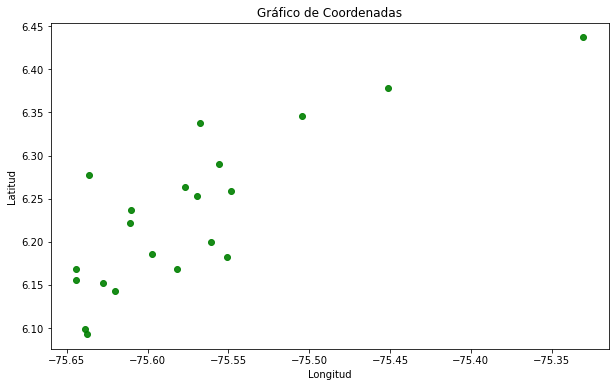

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, marker='o', color='green', alpha=0.9)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfico de Coordenadas')
plt.show()

